In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

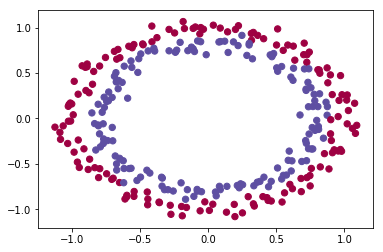

In [2]:
# 生成数据、可视化

np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
np.random.seed(2)
test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_X = test_X.T
test_Y = test_Y.reshape((1, test_Y.shape[0]))

In [17]:
# 决策边界

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0,:], cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(parameters, X): # 预测
    
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    
    return predictions

In [4]:
# 正向传播

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    s = np.maximum(0,x)
    return s

def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

def compute_cost(a3, Y): # 成本
    
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    
    return loss

In [5]:
# 反向传播

def backward_propagation(X, Y, cache):
    
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

def update_parameters(parameters, grads, learning_rate): # 更新参数
    
    n = len(parameters) // 2 
    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters


In [6]:
# 预测结果

def predict(X, y, parameters):

    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    a3, caches = forward_propagation(X, parameters)

    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("识别准确度: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

In [7]:
# 三种参数初始化

def initialize_parameters_zeros(layers_dims): # zero初始化
    
    parameters = {}
    L = len(layers_dims)           
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters

def initialize_parameters_random(layers_dims): # 随机初始化
    
    np.random.seed(3)              
    parameters = {}
    L = len(layers_dims)           
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters
 
def initialize_parameters_he(layers_dims): # He初始化
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(1.0/(layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters


In [21]:
#建立整个模型

def model(X, Y, learning_rate = 0.01, layers_dims = [], num_iterations = 15000, initialization = "he", print_cost = True):
        
    grads = {}
    costs = []                          
    m = X.shape[1]                      
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
  
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_cost(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 3000 == 0:
            print("循环{}次后的成本值: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    #画出成本曲线
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

----------zero初始化---------
循环0次后的成本值: 0.6931471805599453
循环3000次后的成本值: 0.6931471805599453
循环6000次后的成本值: 0.6931471805599453
循环9000次后的成本值: 0.6931471805599453
循环12000次后的成本值: 0.6931471805599453


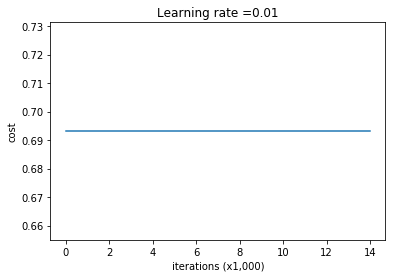

----------随机初始化----------
循环0次后的成本值: inf


/home/hugsy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/home/hugsy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


循环3000次后的成本值: 0.5636242569764779
循环6000次后的成本值: 0.5373584514307651
循环9000次后的成本值: 0.3934423376823982
循环12000次后的成本值: 0.3861261344766218


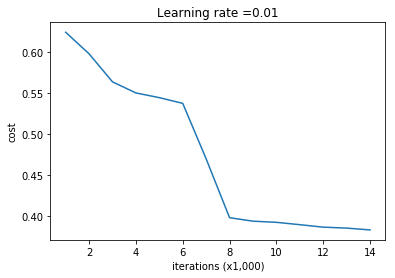

----------He初始化----------
循环0次后的成本值: 0.729451703805014
循环3000次后的成本值: 0.6783983102177117
循环6000次后的成本值: 0.5845947883351541
循环9000次后的成本值: 0.29444331521215017
循环12000次后的成本值: 0.1500800971837769


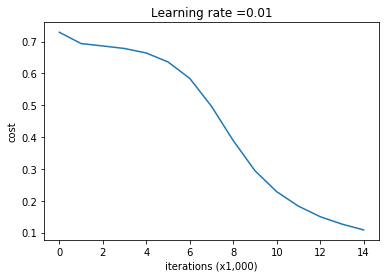

In [22]:
# 成本变化对比

layers = [train_X.shape[0], 10, 5, 1] # 各层节点数

print('----------zero初始化---------')
parameters_init_zeros = model(train_X, train_Y, layers_dims = layers, initialization = "zeros")
print('----------随机初始化----------')
parameters_init_random = model(train_X, train_Y, layers_dims = layers, initialization = "random")
print('----------He初始化----------')
parameters_init_he = model(train_X, train_Y, layers_dims = layers, initialization = "he")

----------zero初始化---------


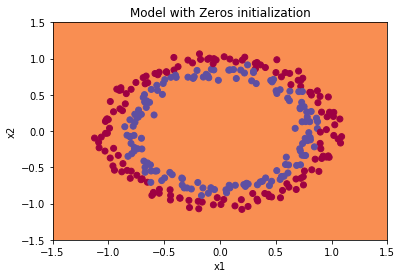

训练集中:
识别准确度: 0.5
测试集中:
识别准确度: 0.5
----------随机初始化---------


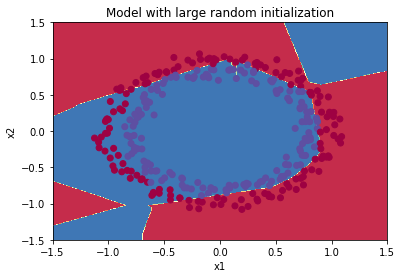

训练集中:
识别准确度: 0.83
测试集中:
识别准确度: 0.86
----------He初始化---------


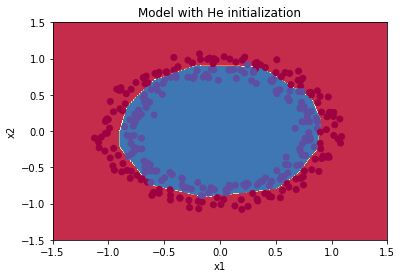

训练集中:
识别准确度: 0.99
测试集中:
识别准确度: 0.93


In [19]:
# 决策边界、预测准确度对比

print('----------zero初始化---------')
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_init_zeros, x.T), train_X, train_Y)
print ("训练集中:")
predictions_train = predict(train_X, train_Y, parameters_init_zeros)
print ("测试集中:")
predictions_test = predict(test_X, test_Y, parameters_init_zeros)

print('----------随机初始化---------')
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_init_random, x.T), train_X, train_Y)
print ("训练集中:")
predictions_train = predict(train_X, train_Y, parameters_init_random)
print ("测试集中:")
predictions_test = predict(test_X, test_Y, parameters_init_random)

print('----------He初始化---------')
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_init_he, x.T), train_X, train_Y)
print ("训练集中:")
predictions_train = predict(train_X, train_Y, parameters_init_he)
print ("测试集中:")
predictions_test = predict(test_X, test_Y, parameters_init_he)